In [1]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
Numpy Version 1.22.2
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2

In [3]:
from Scripts.experiments import create_precision_recall_curves
from Scripts.experiments import create_precision_recall_curves_all

# scBiGLasso Easy

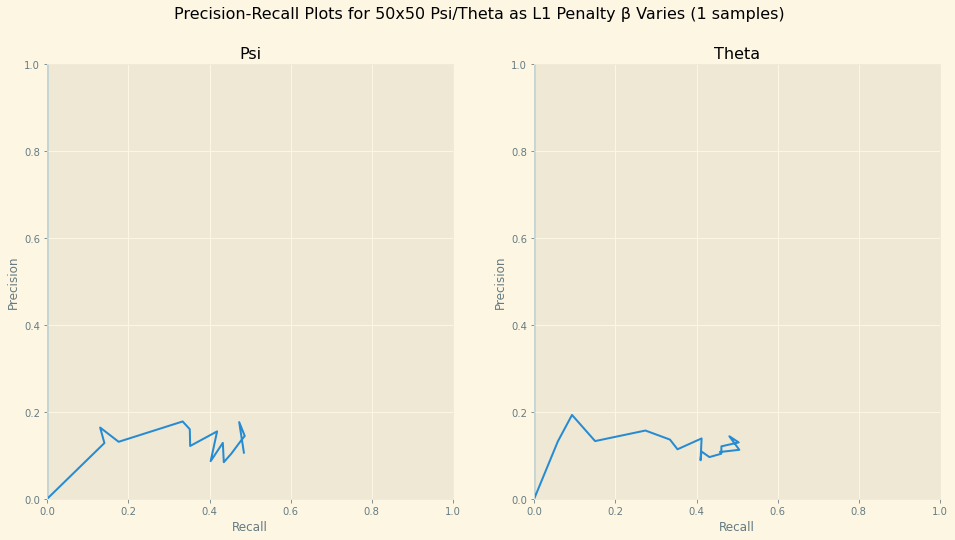

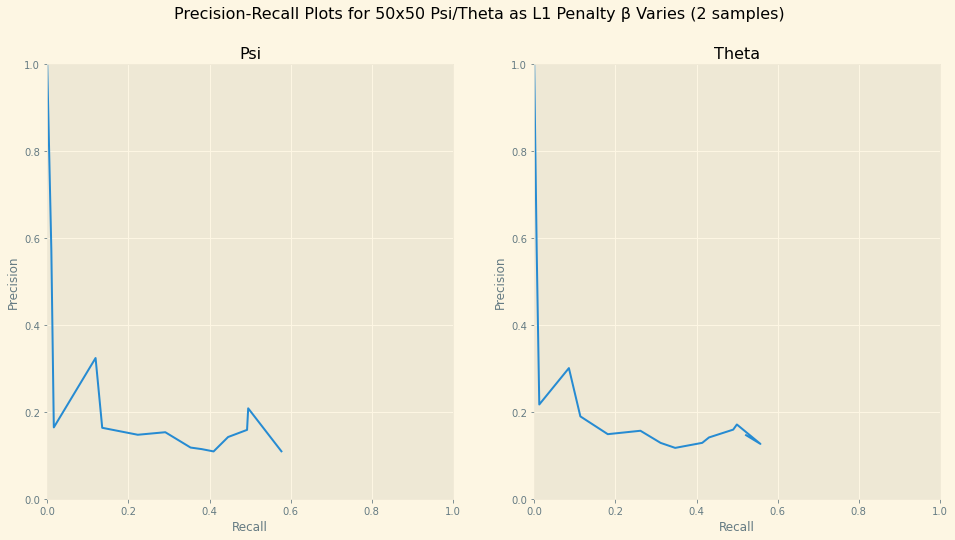

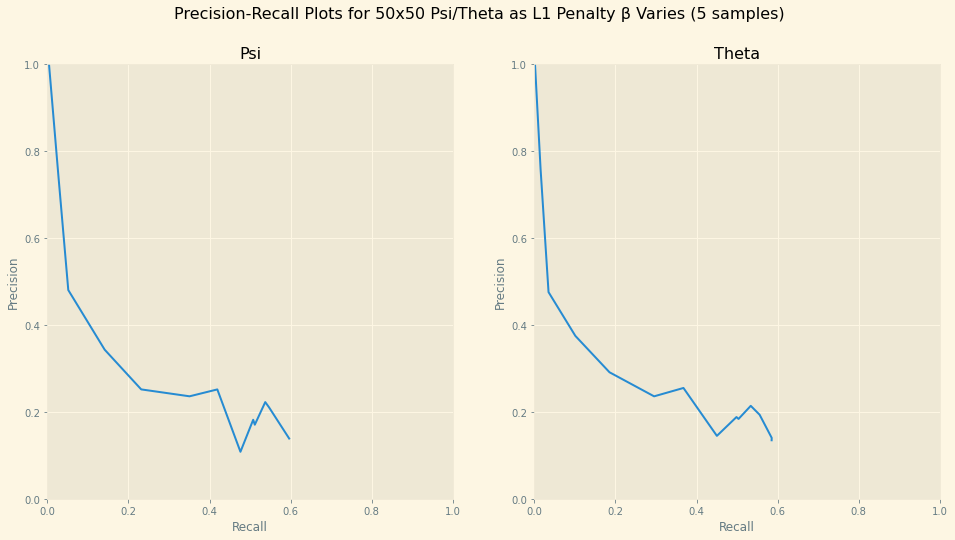

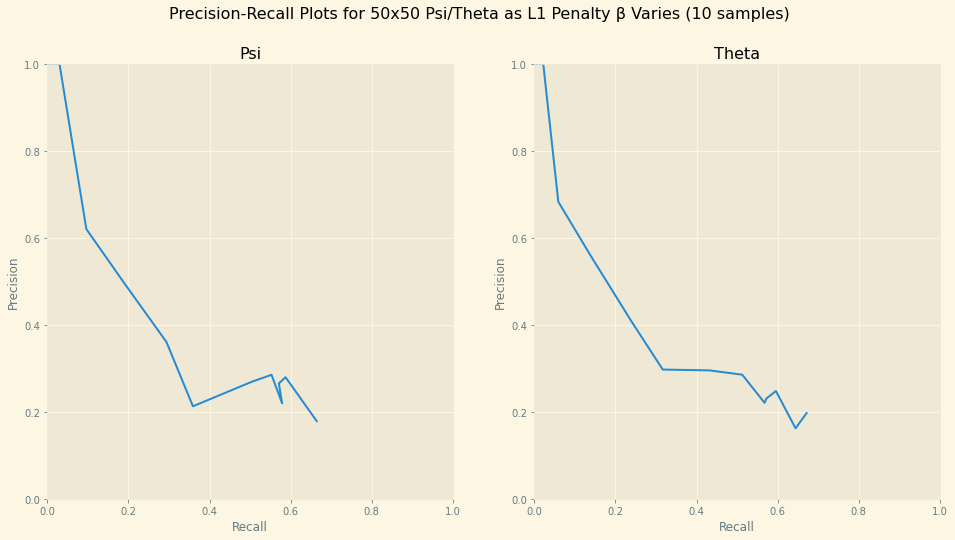

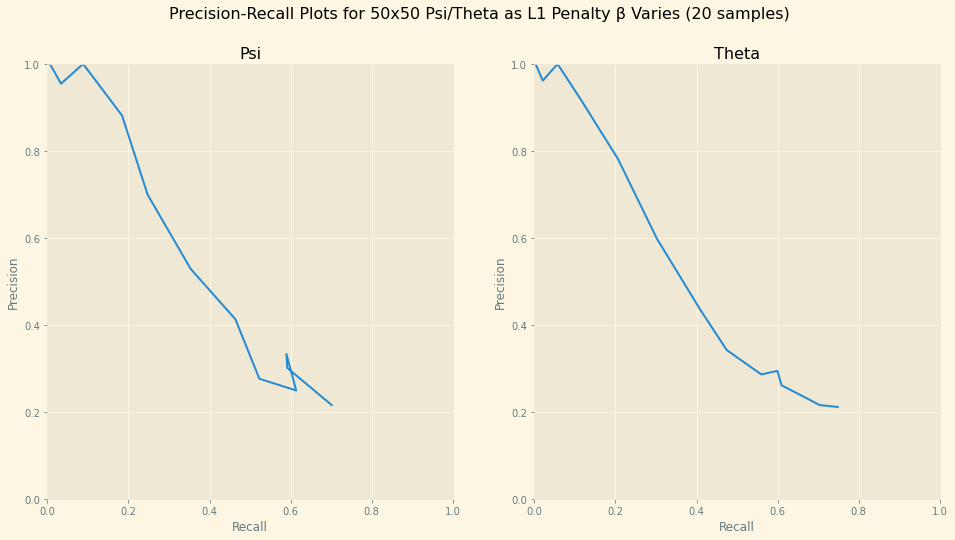

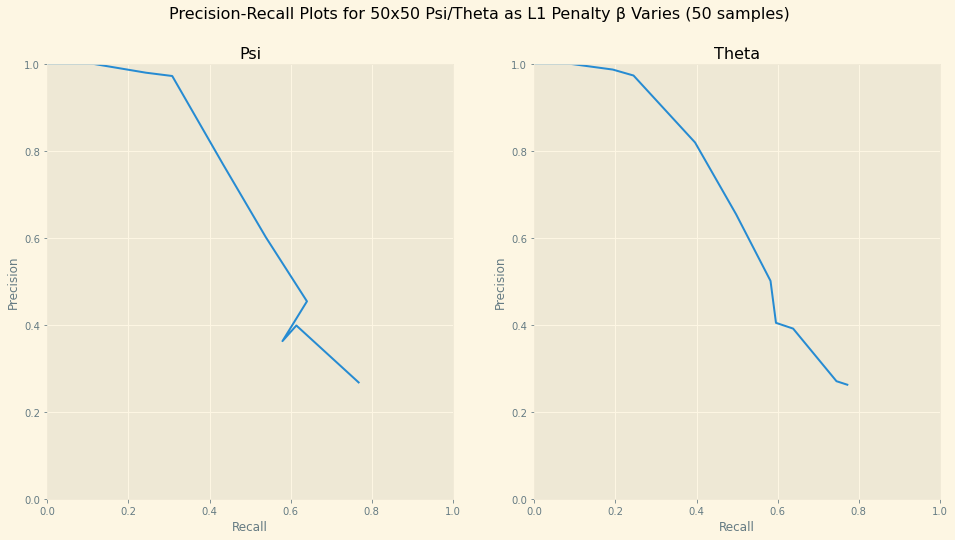

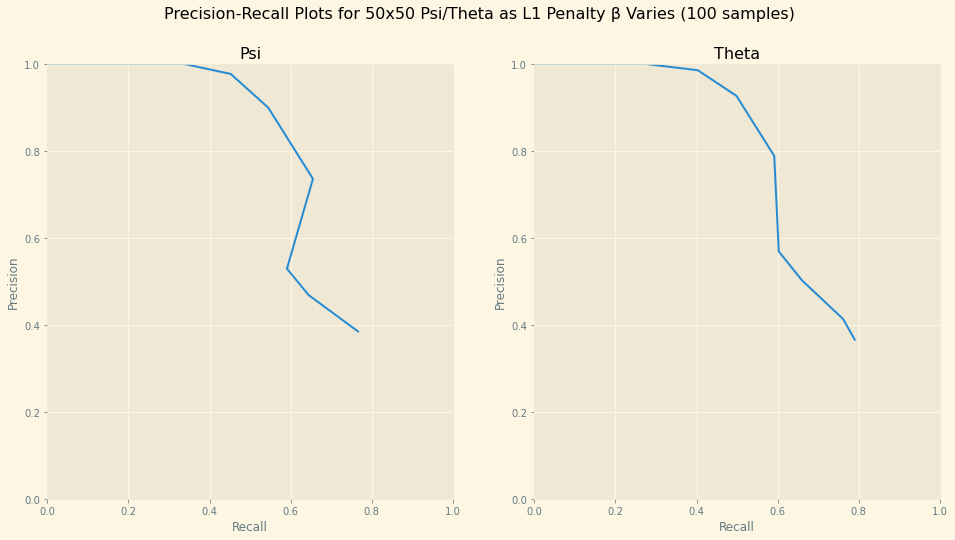

In [33]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for scBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-1, 1, 0.1), # 50
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1),
    10**np.arange(-1, 1, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=5, # Too slow for more attempts!
        indices_to_highlight=[],
        alg="scBiGLasso",
        df_scale=2
    )
    fig.savefig(f'../../Plots/Vary Samples - scBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}')
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

## anBiGLasso Easy

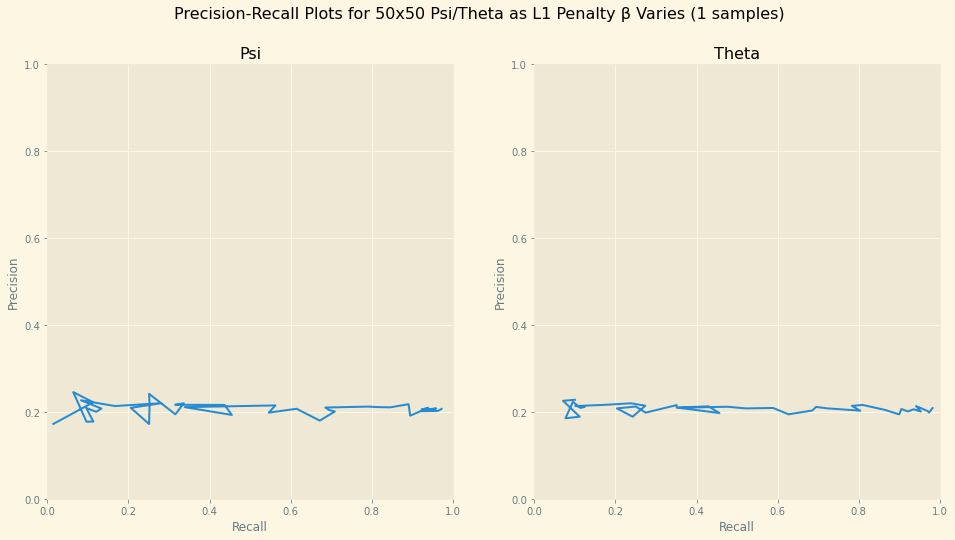

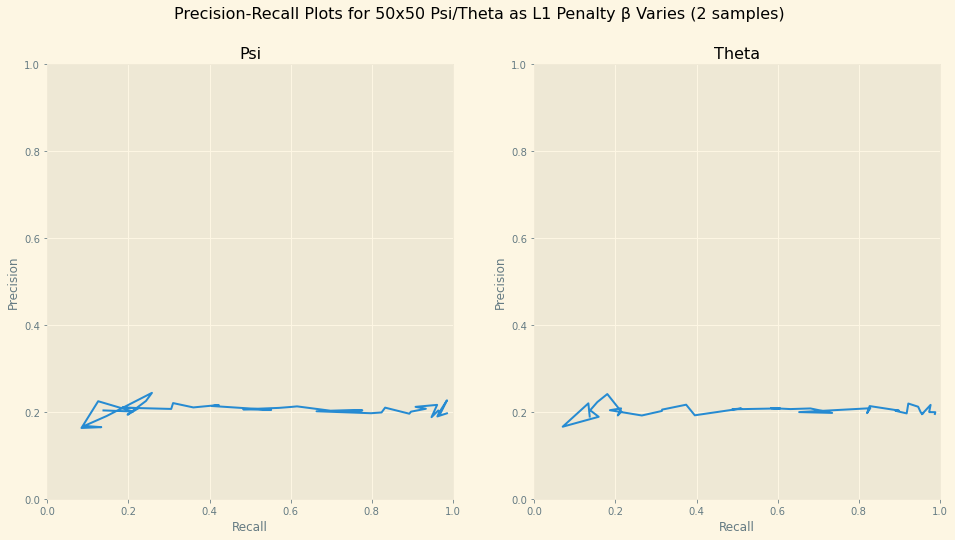

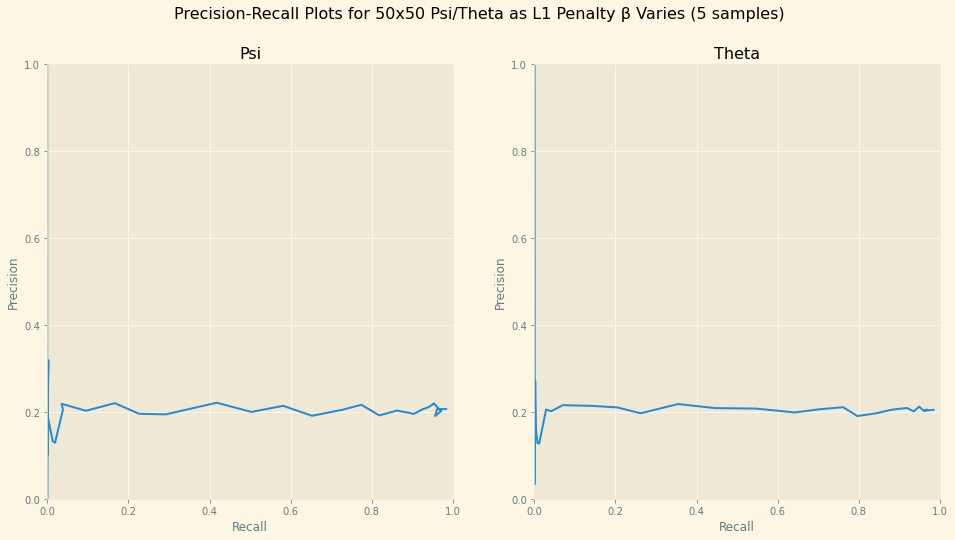

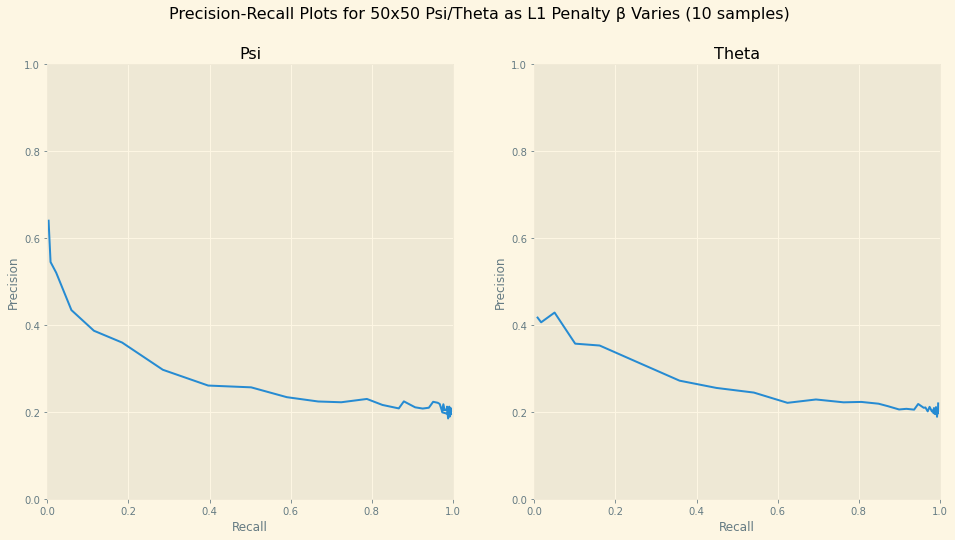

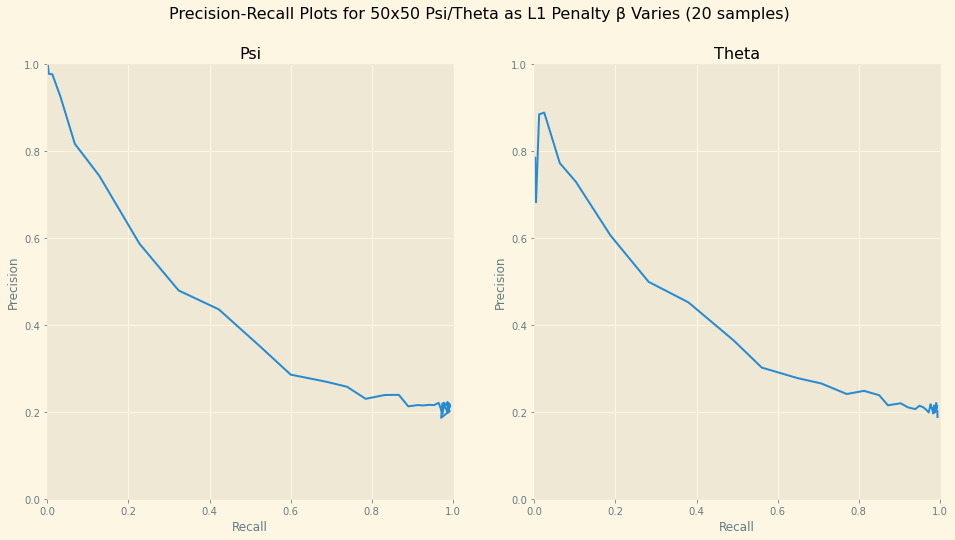

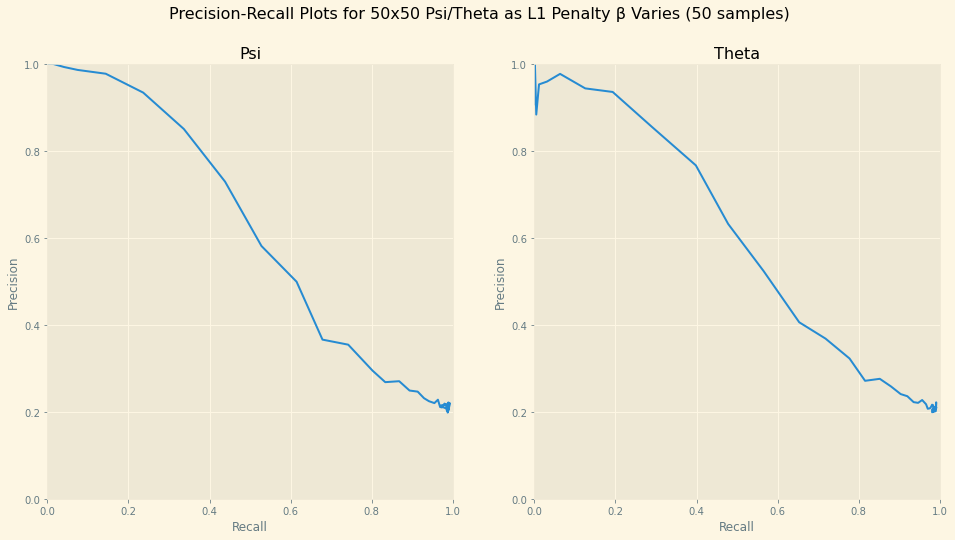

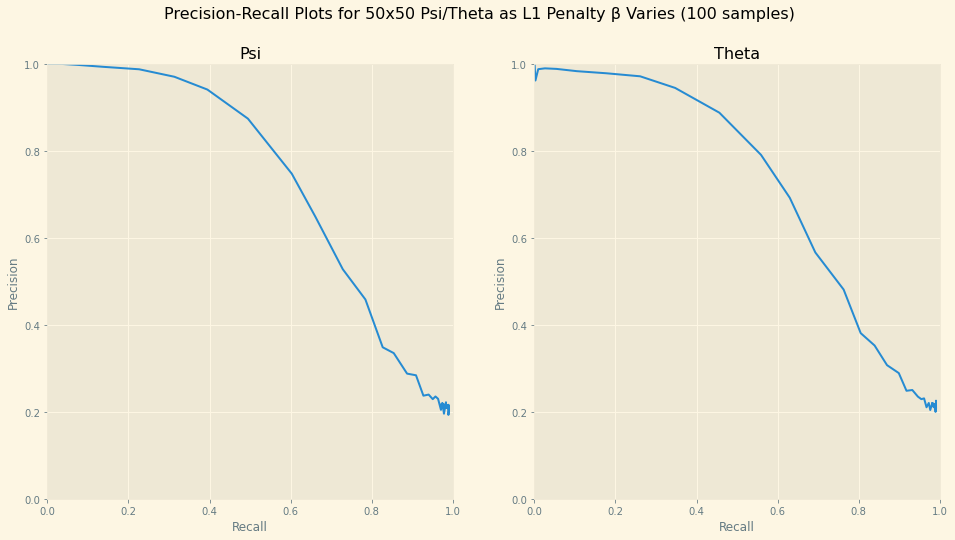

In [66]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for anBiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(2, 6, 0.1),
    10**np.arange(2, 6, 0.1),
    10**np.arange(-2, 2, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1),
    10**np.arange(-4, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=50,
        indices_to_highlight=[],
        alg="anBiGLasso",
        df_scale=2,
        B_approx_iters=10,
        cm_mode='Nonzero'
    )
    #fig.savefig(
    #    f'../../Plots/Vary Samples - anBiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    #)
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

# EiGLasso Easy

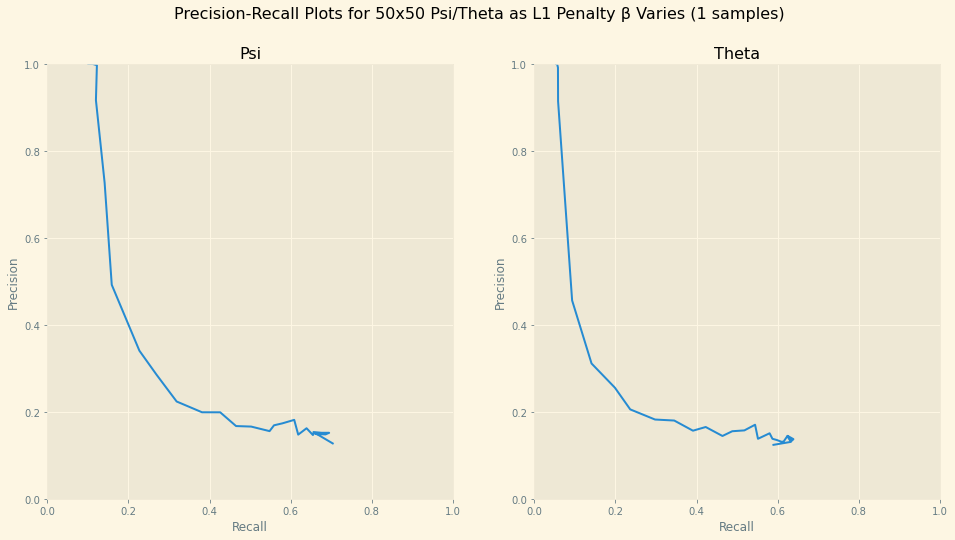

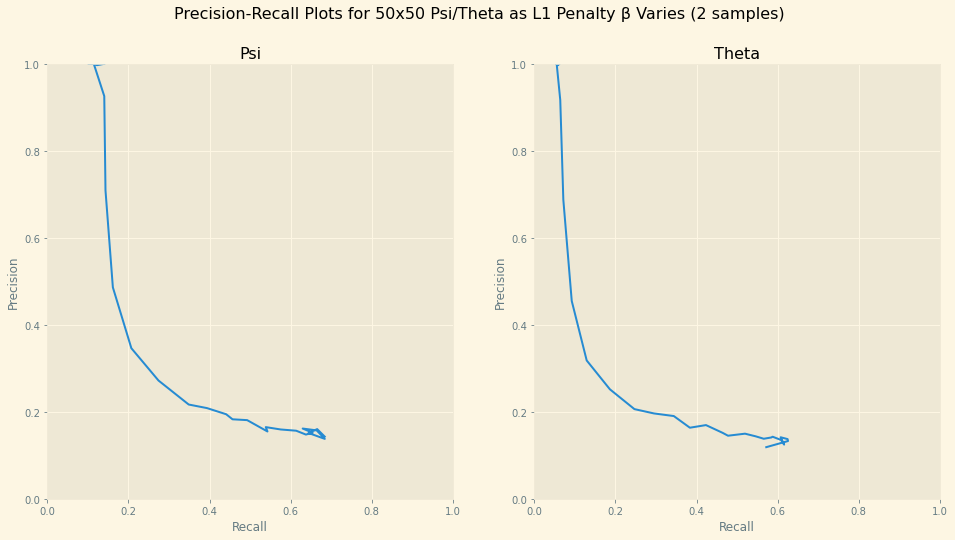

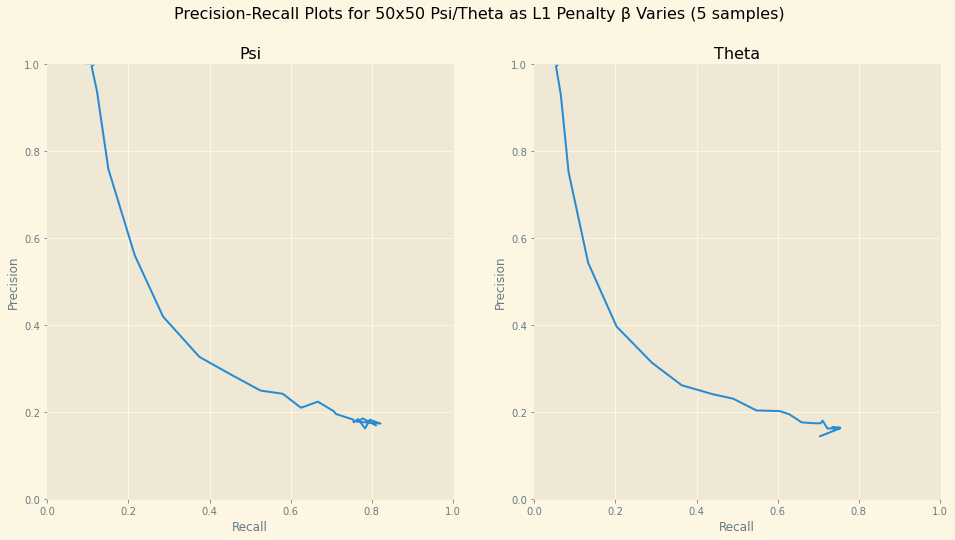

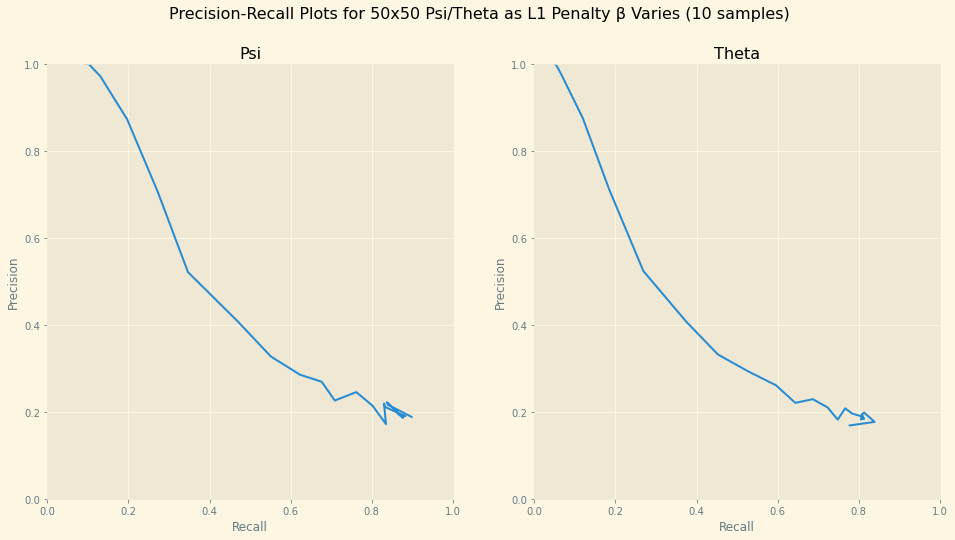

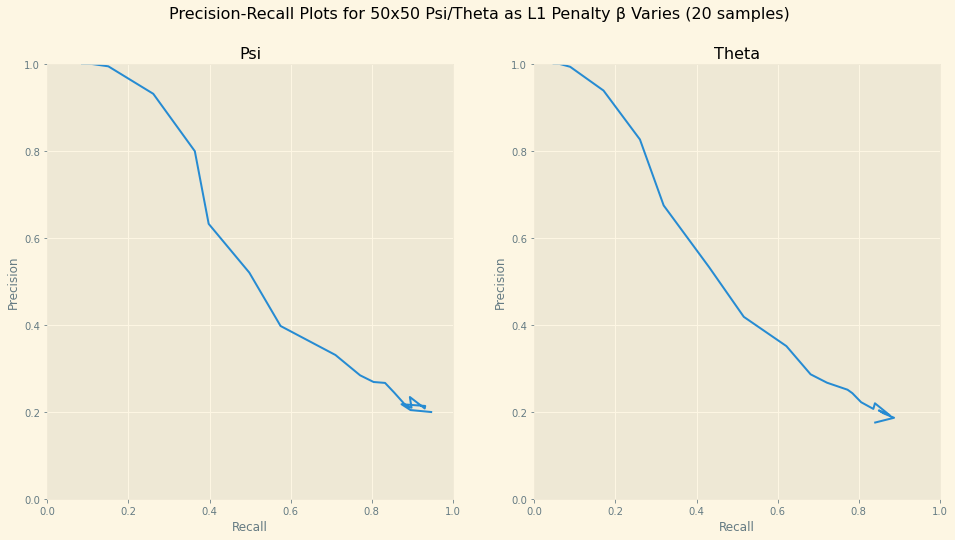

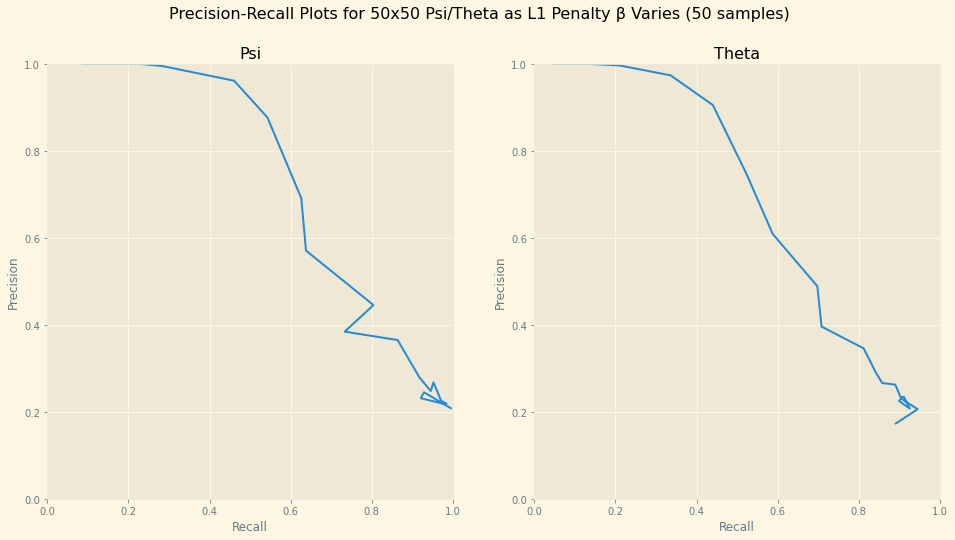

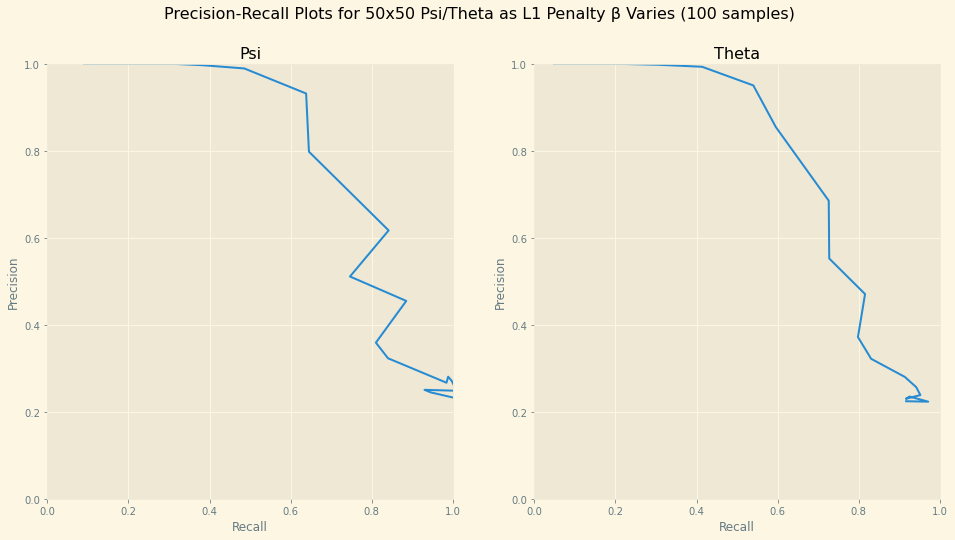

In [48]:
# How does choice of betas and matrix size affect results?
# on 'easy' data
# =================== for EiGLasso ================
samples = [1, 2, 5, 10, 20, 50, 100]
betas = [
    10**np.arange(-3, 0, 0.1), # 50
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1),
    10**np.arange(-3, 0, 0.1)
]
vary_sizes_experiment = dict({})
for idx, m in enumerate(samples):
    fig, axs, dicts = create_precision_recall_curves(
        betas[idx],
        m,
        50,
        attempts=25,
        indices_to_highlight=[],
        alg="EiGLasso",
        df_scale=2
    )
    fig.savefig(
        f'../../Plots/Vary Samples - EiGLasso - Easy/Precision-Recall-Vary-Samples-{m}'
    )
    display(fig) # Force figure to display NOW (`fig.show()` does not do this)
    plt.close(fig) # Suppress double-displaying the figure

# All Together

Trying algorithm: anBiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: EiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

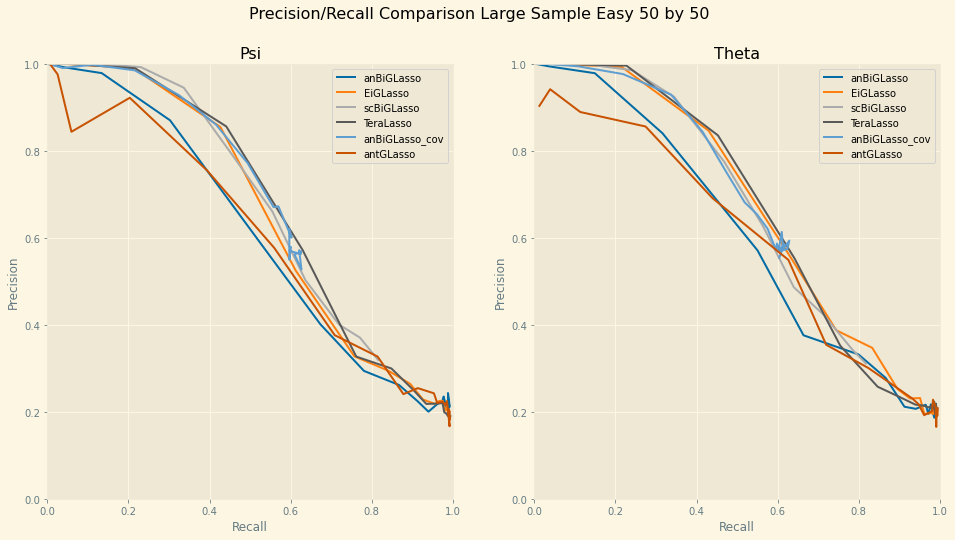

In [229]:
fig, axs = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #an
        10**np.arange(-4, 0, 0.2), #Eig
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #tera
        10**np.arange(-6, -2, 0.2), #an_cov
        10**np.arange(-4, 0, 0.2) #ant
    ]),
    algorithms=[
        "anBiGLasso",
        "EiGLasso",
        "scBiGLasso",
        "TeraLasso",
        "anBiGLasso_cov",
        "antGLasso"
    ],
    m=50,
    p=50,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 50 Samples Easy 50 by 50",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 50 Samples'
)

Trying algorithm: anBiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: EiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

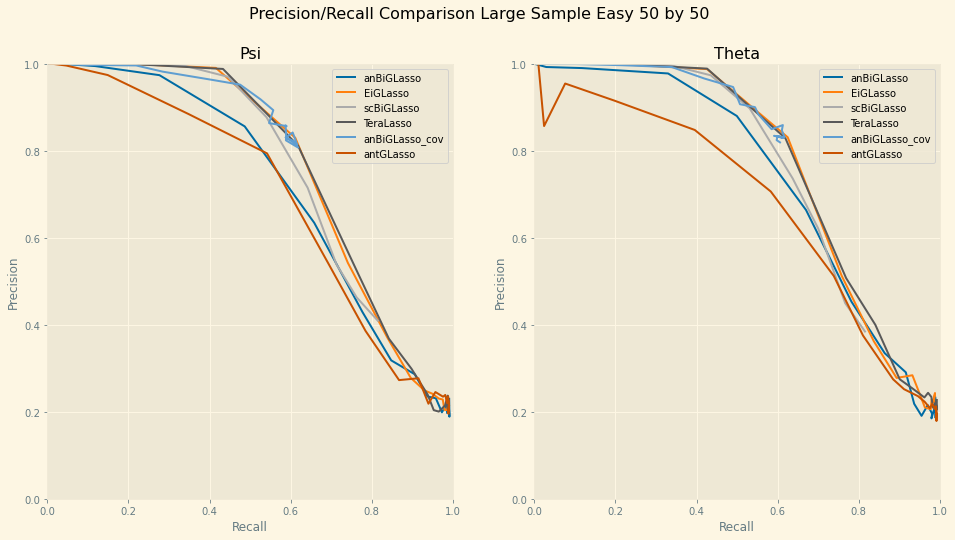

In [230]:
fig, axs = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #an
        10**np.arange(-4, 0, 0.2), #Eig
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #tera
        10**np.arange(-6, -2, 0.2), #an_cov
        10**np.arange(-4, 0, 0.2) #ant
    ]),
    algorithms=[
        "anBiGLasso",
        "EiGLasso",
        "scBiGLasso",
        "TeraLasso",
        "anBiGLasso_cov",
        "antGLasso"
    ],
    m=100,
    p=50,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 100 Samples Easy 50 by 50",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 100 Samples'
)

Trying algorithm: anBiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: EiGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: scBiGLasso
	Trying beta=0.100000
	Trying beta=

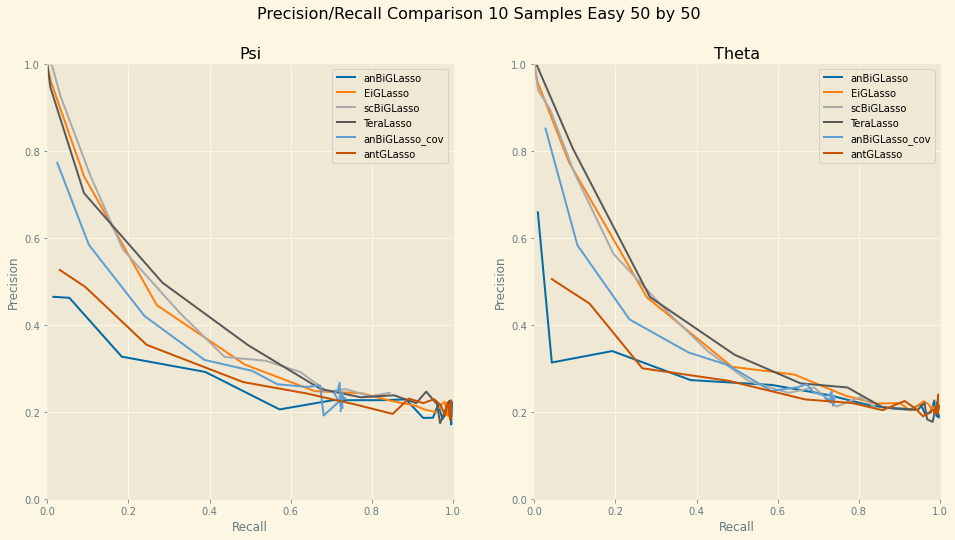

In [233]:
fig, axs = create_precision_recall_curves_all(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #an
        10**np.arange(-4, 0, 0.2), #Eig
        10**np.arange(-1, 1, 0.1), #sc
        10**np.arange(-4, 0, 0.2), #tera
        10**np.arange(-6, -2, 0.2), #an_cov
        10**np.arange(-4, 0, 0.2) #ant
    ]),
    algorithms=[
        "anBiGLasso",
        "EiGLasso",
        "scBiGLasso",
        "TeraLasso",
        "anBiGLasso_cov",
        "antGLasso"
    ],
    m=10,
    p=50,
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title="Precision/Recall Comparison 10 Samples Easy 50 by 50",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Easy 10 Samples'
)

# Tensor Data

In [258]:
from Scripts.experiments import create_precision_recall_curves_tensor

In [ ]:
fig, axs = create_precision_recall_curves_tensor(
    betas_to_try=np.array([
        10**np.arange(-4, 0, 0.2), #ant
        10**np.arange(-4, 0, 0.2), #tera
    ]),
    algorithms=[
        "antGLasso",
        "TeraLasso"
    ],
    m=(m:=10),
    ds=(ds:=[50, 50, 50]),
    attempts=20,
    df_scale=2,
    cm_mode="Nonzero",
    title=f"Precision/Recall Comparison {m} Samples Easy, Shape: {ds}",
    verbose=True
)
fig.savefig(
    f'../../Plots/Precision-Recall/Tensor {ds} Easy {m} Samples'
)

Trying algorithm: antGLasso
	Trying beta=0.000100
	Trying beta=0.000158
	Trying beta=0.000251
	Trying beta=0.000398
	Trying beta=0.000631
	Trying beta=0.001000
	Trying beta=0.001585
	Trying beta=0.002512
	Trying beta=0.003981
	Trying beta=0.006310
	Trying beta=0.010000
	Trying beta=0.015849
	Trying beta=0.025119
	Trying beta=0.039811
	Trying beta=0.063096
	Trying beta=0.100000
	Trying beta=0.158489
	Trying beta=0.251189
	Trying beta=0.398107
	Trying beta=0.630957
Trying algorithm: TeraLasso
	Trying beta=0.000100
	Trying beta=0.000158


In [277]:
from Scripts.anBiGLasso import anBiGLasso
from Scripts.antGLasso import antGLasso
from Scripts.generate_data import generate_Ys

Psis, Ys = generate_Ys(
    m=(m:=10),
    ds=(ds:=[50, 50, 50]),
    expected_nonzero=ds[0]**2 // 10
)
print(Psis)
antGLasso(Ys, betas=[0.01, 0.01])

[array([[ 0.149, -0.   ,  0.   , ...,  0.   , -0.   ,  0.   ],
       [-0.   ,  0.608, -0.   , ..., -0.   ,  0.   , -0.   ],
       [ 0.   , -0.   ,  1.84 , ...,  0.   , -0.   ,  0.   ],
       ...,
       [ 0.   , -0.   ,  0.   , ...,  2.842, -0.   ,  0.   ],
       [-0.   ,  0.   , -0.   , ..., -0.   ,  3.573, -0.   ],
       [ 0.   , -0.   ,  0.   , ...,  0.   , -0.   ,  1.962]]), array([[ 0.321, -0.   ,  0.   , ...,  0.378,  0.067, -0.   ],
       [-0.   ,  2.394, -0.   , ..., -0.   ,  0.   ,  0.   ],
       [ 0.   , -0.   ,  0.259, ...,  0.   , -0.   , -0.   ],
       ...,
       [ 0.378, -0.   ,  0.   , ...,  2.097, -0.946, -0.   ],
       [ 0.067,  0.   , -0.   , ..., -0.946,  1.407,  0.   ],
       [-0.   ,  0.   , -0.   , ..., -0.   ,  0.   ,  0.662]])]


[array([[-1.503,  0.007, -0.012, ..., -0.003,  0.   ,  0.005],
        [ 0.007, -0.433, -0.037, ...,  0.   ,  0.   ,  0.   ],
        [-0.012, -0.037, -0.552, ..., -0.005,  0.   , -0.   ],
        ...,
        [-0.003,  0.   , -0.005, ...,  1.106, -0.048, -0.   ],
        [ 0.   ,  0.   ,  0.   , ..., -0.048,  1.833,  0.009],
        [ 0.005,  0.   , -0.   , ..., -0.   ,  0.009,  0.575]]),
 array([[ 2.34 ,  0.003,  0.   , ...,  0.091,  0.03 ,  0.01 ],
        [ 0.003,  4.586,  0.   , ...,  0.   , -0.01 , -0.001],
        [ 0.   ,  0.   ,  2.73 , ..., -0.   ,  0.   ,  0.   ],
        ...,
        [ 0.091,  0.   , -0.   , ...,  3.705, -0.462,  0.033],
        [ 0.03 , -0.01 ,  0.   , ..., -0.462,  3.283, -0.017],
        [ 0.01 , -0.001,  0.   , ...,  0.033, -0.017,  3.695]])]